In [1]:
import matplotlib as mpl
import mplhep
%matplotlib inline
mpl.style.use(mplhep.style.ROOT)
import matplotlib.pyplot as plt

import hist
import upldmx
import awkward as ak
import numpy as np

In [2]:
events = upldmx.arrays()

1. Muon scattering angle
2. Muon pair opening angle
3. Muon-contributed sim hits in first layer

In [3]:
muons = events.SimParticles[abs(events.SimParticles.pdgID)==13]

(array([1.31385e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.00000e+00]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 10 artists>)

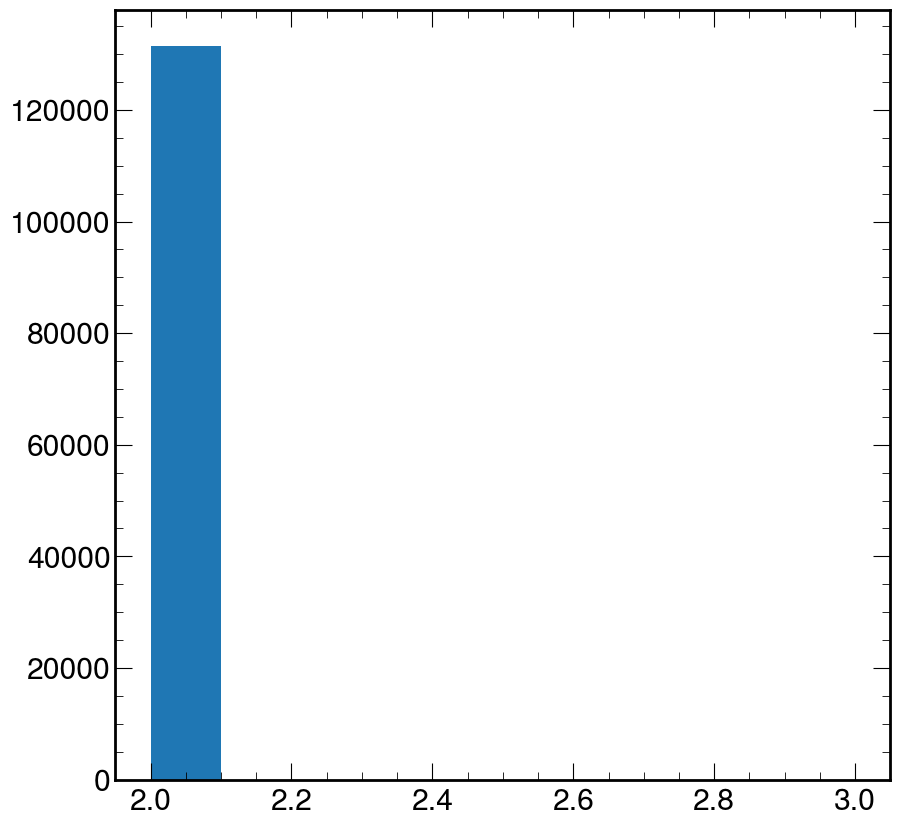

In [4]:
plt.hist(ak.count(muons.genStatus, axis=-1))

In [5]:
angles = (
    hist.Hist.new
    .Reg(100,0,np.pi,label='Muon Scattering Angle [rad]')
    .Reg(100,0,np.pi,label='Pair Opening Angle [rad]')
    .Double()
)
angles.fill(
    *[ak.flatten(a)
      for a in ak.broadcast_arrays(
          muons.momentum.theta,
          muons[:,0].momentum.deltaangle(muons[:,1].momentum)
      )
     ]
)

Hist(
  Regular(100, 0, 3.14159, label='Muon Scattering Angle [rad]'),
  Regular(100, 0, 3.14159, label='Pair Opening Angle [rad]'),
  storage=Double()) # Sum: 262788.0

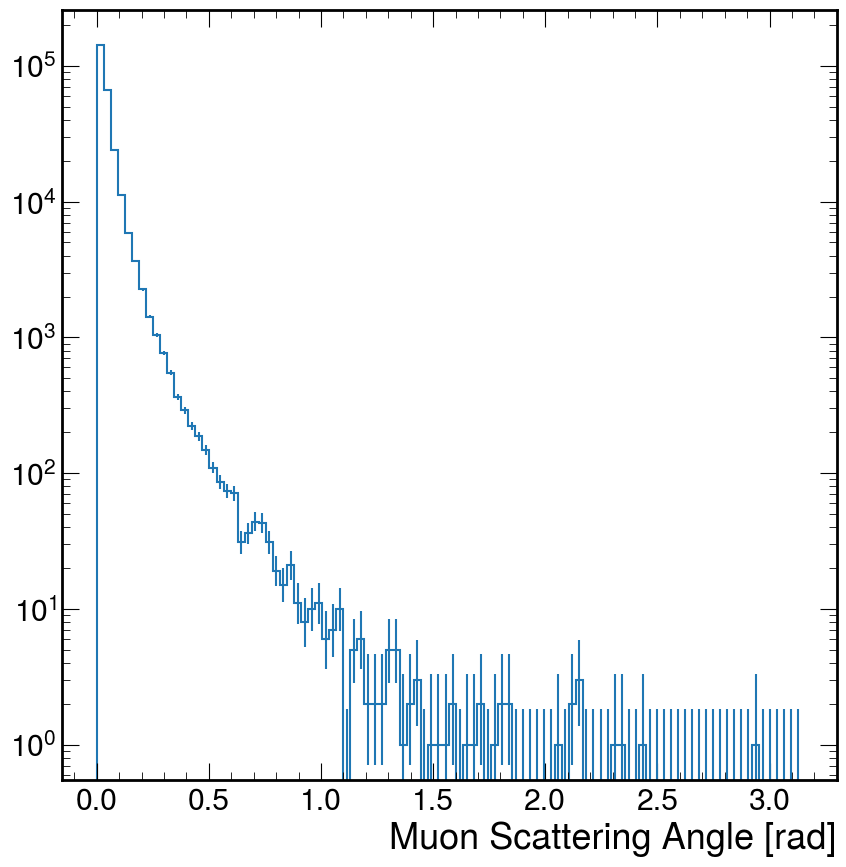

In [6]:
angles[:,sum].plot()
plt.yscale('log')

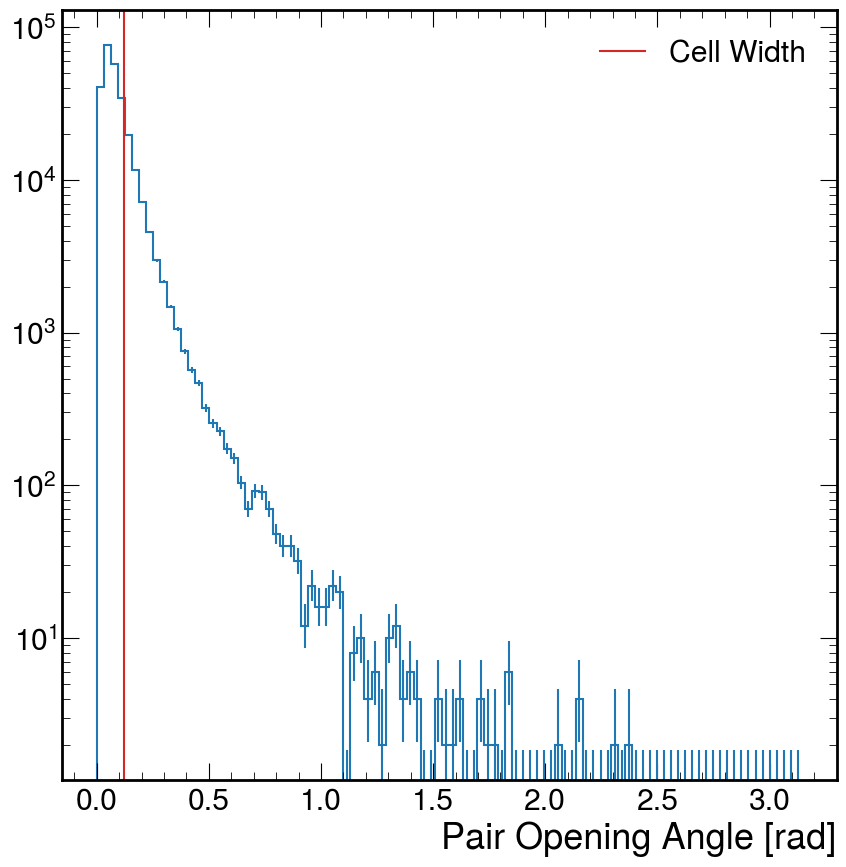

In [7]:
angles[sum,:].plot()
plt.yscale('log')
plt.axvline(
    30 / 250,
    label='Cell Width',
    color='tab:red'
)
plt.legend()
plt.show()

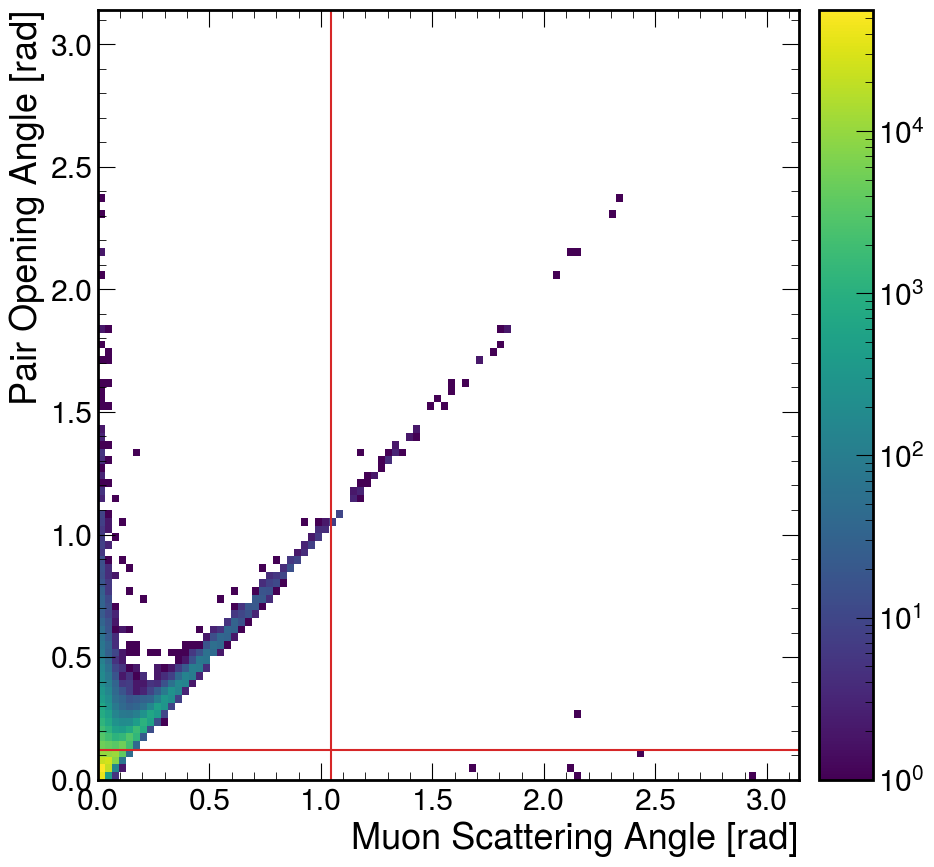

In [8]:
angles.plot(cmin=1, norm='log')
plt.axhline(30/250, color='tab:red')
plt.axvline(np.pi/3, color='tab:red')
plt.show()

In [9]:
hits = events.EcalSimHits[events.EcalSimHits.layer==0]

(array([9.0700e+02, 2.2042e+04, 8.5033e+04, 1.8206e+04, 4.1540e+03,
        8.6000e+02, 1.5700e+02, 2.5000e+01, 5.0000e+00, 2.0000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

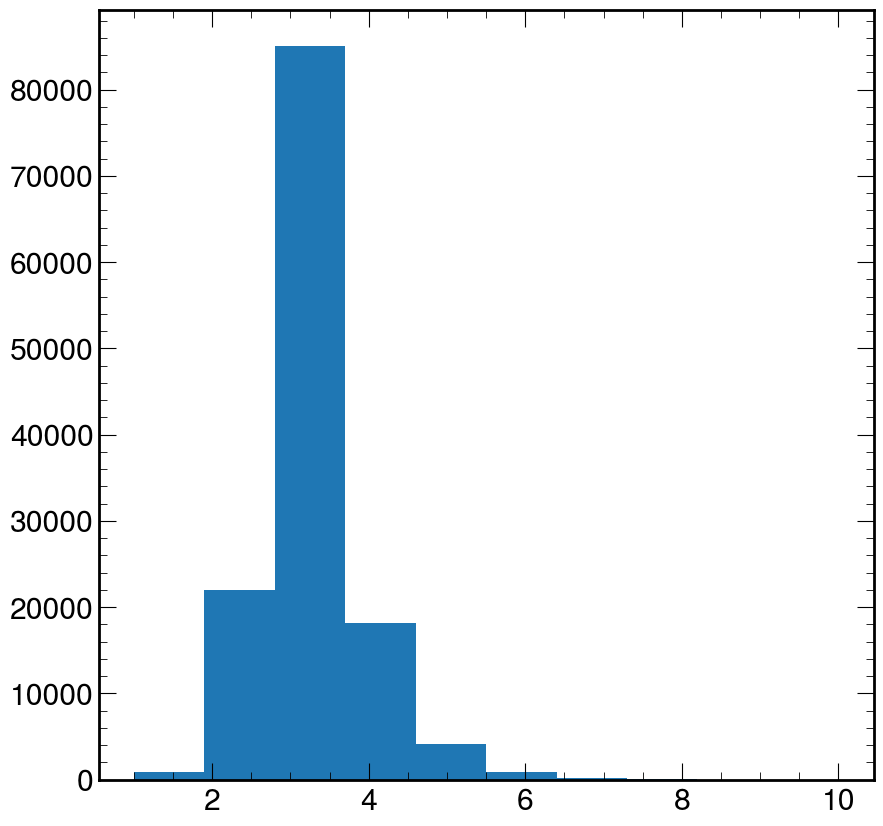

In [10]:
plt.hist(ak.count(hits.id, axis=-1))